<a href="https://colab.research.google.com/github/Abhitay/Machine-Learning/blob/main/Comparison_of_Supervised_ML_Models_for_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


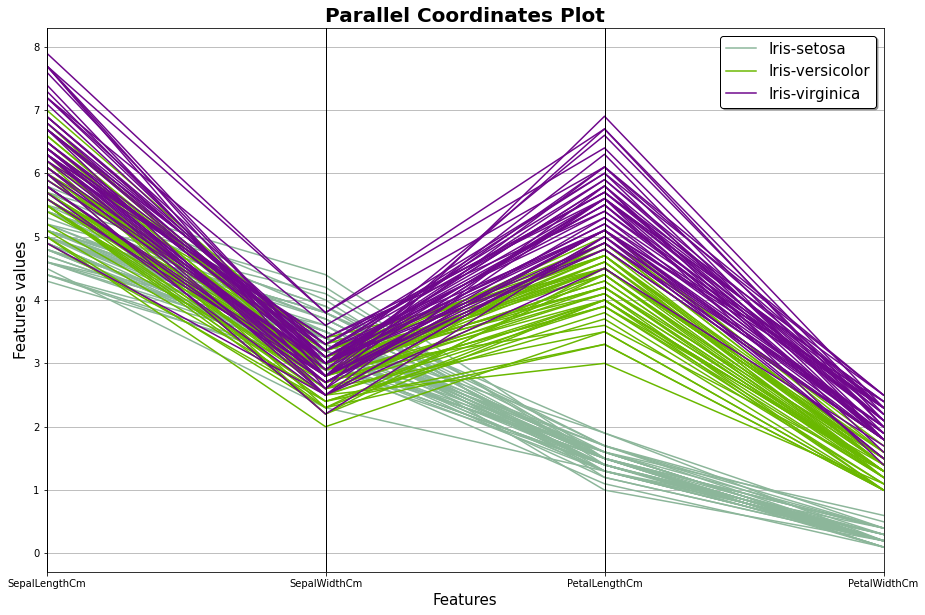

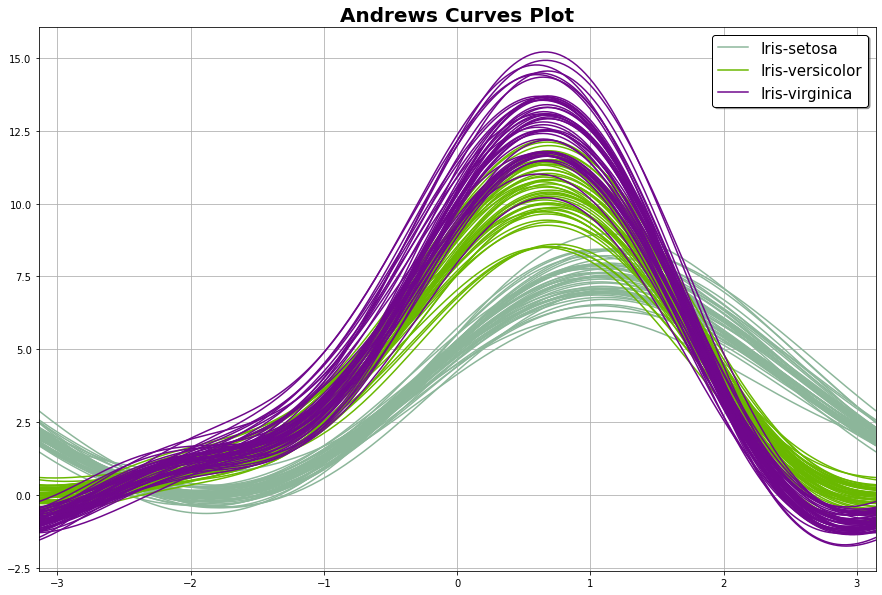

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

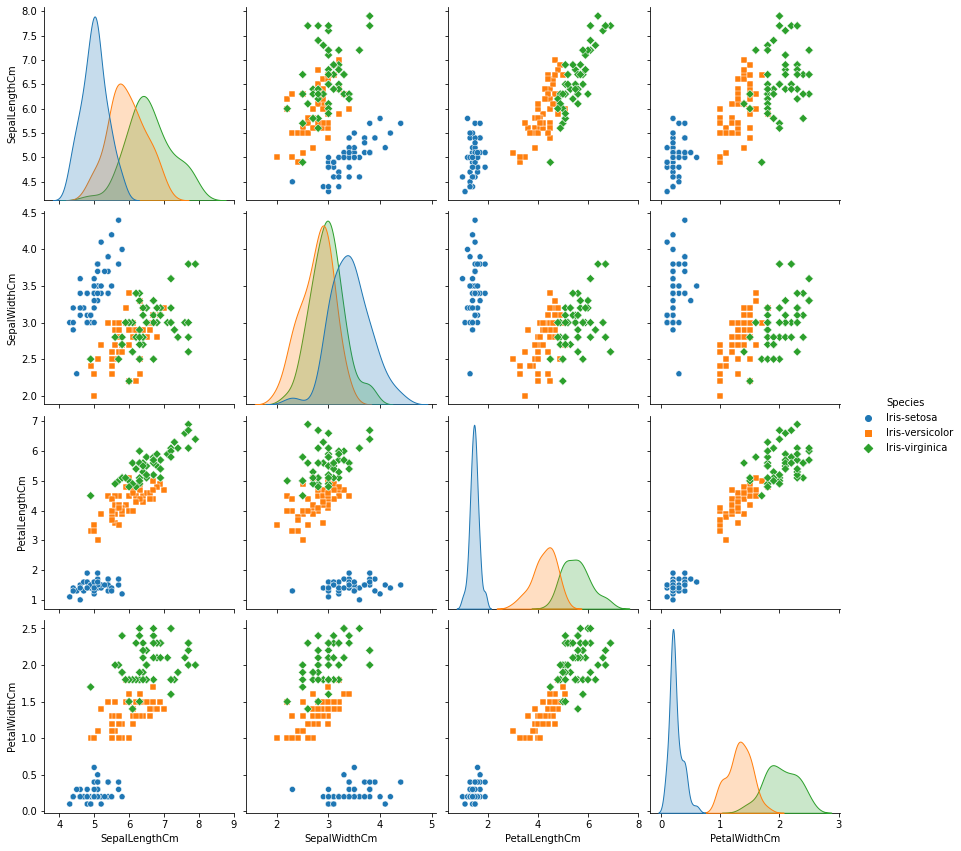

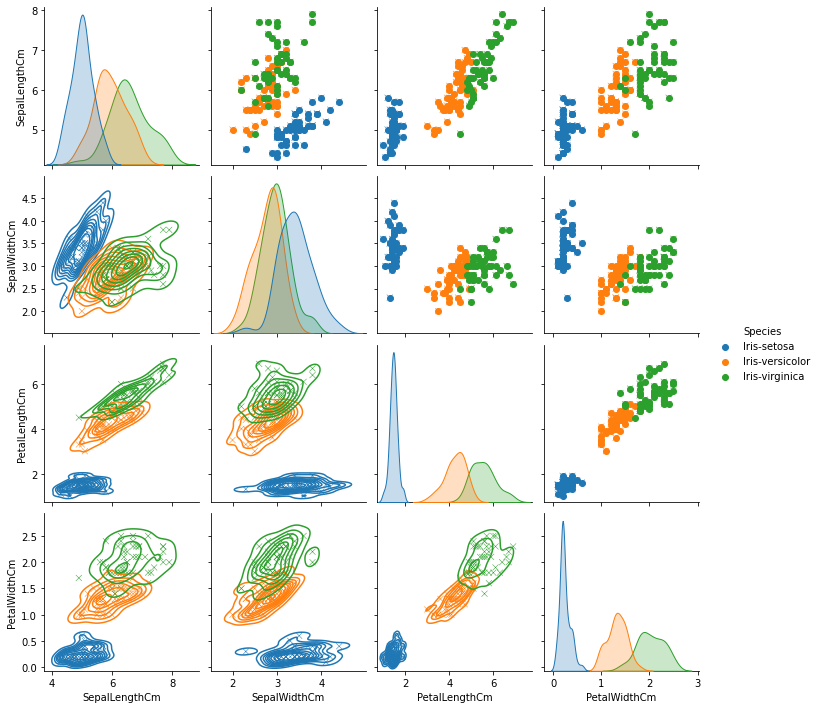

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Iris.csv")
print(df.groupby('Species').size())

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

snsdata = df.drop(['Id'], axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

In [ ]:
import time

In [ ]:
# LINEAR REGRESSION 
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
start_time = time.time()
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Iris.csv")

# --------- Label encoding --------------
# print(df['Species'].unique())

label_encoder = preprocessing.LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# print(df['Species'].unique())
# ----------------------------------------

x = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Lin = LinearRegression()
Lin.fit(x_train, y_train)

y_pred = Lin.predict(x_test)

# --------- Predict---------------------
predict = Lin.predict([[6.3,2.8,5.1,1.5]])
# print(type(predict))
# print(predict)
#
# print(type(np.around(predict).astype(int)))
# print(np.around(predict).astype(int))

# print(type(np.argmax(predict)))
# print(np.argmax(predict))

# print(label_encoder.inverse_transform(predict))
print(f"Our prediction:{label_encoder.inverse_transform(np.around(predict).astype(int))}")
# ----------------------------------------

print(f"Our prediction error: {abs(y_test - y_pred).mean()}")

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Lin, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

# Evaluating Model's Performance
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_pred = label_encoder.inverse_transform(df['Species'])
y_test = label_encoder.inverse_transform(df['Species'])

# print(f"X test:{x_test}\n")
# print(f"Y test:{y_test}\n")
# print(f"Our model prediction:{y_pred}\n")

print(f"Our accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Our confusion matrix: \n {confusion_matrix(y_test, y_pred)}")

print(time.time() - start_time)

Our prediction:['Iris-versicolor']
Our prediction error: 0.18498283353406483
Accuracy: 90.64 %
Mean Absolute Error: 0.18498283353406483
Mean Squared Error: 0.05067366766134556
Mean Root Squared Error: 0.22510812437880948
Our accuracy: 1.0
Our confusion matrix: 
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
0.02647256851196289


In [ ]:
# LOGISTIC REGRESSION 
# We use logistic only for binary classification, thus we have to use label encoder but we will not get proper result  
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
start_time = time.time()
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Iris.csv")

# --------- Label encoding --------------
# print(df['Species'].unique())

label_encoder = preprocessing.LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# print(df['Species'].unique())
# ----------------------------------------

x = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# -------------- Standard deviation -----------------------
# print(df.describe())

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
# ---------------------------------------------------------

Log = LogisticRegression(max_iter=1000)
Log.fit(x_train, y_train)

y_pred = Log.predict(x_test)

# --------- Predict---------------------
predict = Lin.predict([[6.3,2.8,5.1,1.5]])
# print(type(predict))
# print(predict)

# print(type(np.around(predict).astype(int)))
# print(np.around(predict).astype(int))

# print(type(np.argmax(predict)))
# print(np.argmax(predict))

# print(label_encoder.inverse_transform(predict))
print(f"Our prediction:{label_encoder.inverse_transform(np.around(predict).astype(int))}")
# ----------------------------------------

print(f"Our prediction error: {abs(y_test - y_pred).mean()}")

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Log, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

# Evaluating Model's Performance
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_pred = label_encoder.inverse_transform(df['Species'])
y_test = label_encoder.inverse_transform(df['Species'])

# print(f"X test:{x_test}\n")
# print(f"Y test:{y_test}\n")
# print(f"Our model prediction:{y_pred}\n")

print(f"Our accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Our confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
print(time.time() - start_time)

Our prediction:['Iris-versicolor']
Our prediction error: 0.23333333333333334
Accuracy: 95.00 %
Mean Absolute Error: 0.23333333333333334
Mean Squared Error: 0.23333333333333334
Mean Root Squared Error: 0.48304589153964794
Our accuracy: 1.0
Our confusion matrix: 
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
0.1013491153717041


In [ ]:
# DECISION TREE
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
start_time = time.time()
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Iris.csv")

# --------- Label encoding --------------
# print(df['Species'].unique())

label_encoder = preprocessing.LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# print(df['Species'].unique())
# ----------------------------------------

x = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# -------------- Standard deviation -----------------------
# print(df.describe())

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
# ---------------------------------------------------------

classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

# --------- Predict---------------------
predict = Lin.predict([[6.3,2.8,5.1,1.5]])
# print(type(predict))
# print(predict)

# print(type(np.around(predict).astype(int)))
# print(np.around(predict).astype(int))

# print(type(np.argmax(predict)))
# print(np.argmax(predict))

# print(label_encoder.inverse_transform(predict))
print(f"Our prediction:{label_encoder.inverse_transform(np.around(predict).astype(int))}")
# ----------------------------------------

# print(f"Our prediction error: {abs(y_test - y_pred).mean()}")

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

# Evaluating Model's Performance
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# y_pred = label_encoder.inverse_transform(df['Species'])
# y_test = label_encoder.inverse_transform(df['Species'])

# print(f"X test:{x_test}\n")
# print(f"Y test:{y_test}\n")
# print(f"Our model prediction:{y_pred}\n")

print(f"Our accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Our confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
print(time.time() - start_time)

Our prediction:['Iris-versicolor']
Accuracy: 92.50 %
Mean Absolute Error: 0.23333333333333334
Mean Squared Error: 0.23333333333333334
Mean Root Squared Error: 0.48304589153964794
Our accuracy: 0.7666666666666667
Our confusion matrix: 
 [[11  0  0]
 [ 0  7  6]
 [ 0  1  5]]
0.024924039840698242


In [ ]:
# K NEIGHBORS DECISION TREE (KNN)
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
start_time = time.time()

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Iris.csv")

# --------- Label encoding --------------
# print(df['Species'].unique())

# label_encoder = preprocessing.LabelEncoder()
# df['Species'] = label_encoder.fit_transform(df['Species'])

# print(df['Species'].unique())
# ----------------------------------------

x = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# -------------- Standard deviation -----------------------
# print(df.describe())

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
# ---------------------------------------------------------

classifier = neighbors.KNeighborsClassifier()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

# --------- Predict---------------------
predict = Lin.predict([[6.3,2.8,5.1,1.5]])
# print(type(predict))
# print(predict)

# print(type(np.around(predict).astype(int)))
# print(np.around(predict).astype(int))

# print(type(np.argmax(predict)))
# print(np.argmax(predict))

# print(label_encoder.inverse_transform(predict))
print(f"Our prediction:{label_encoder.inverse_transform(np.around(predict).astype(int))}")
# ----------------------------------------

# print(f"Our prediction error: {abs(y_test - y_pred).mean()}")

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

# Evaluating Model's Performance
# from sklearn.metrics import mean_squared_error
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# y_pred = label_encoder.inverse_transform(df['Species'])
# y_test = label_encoder.inverse_transform(df['Species'])

# print(f"X test:{x_test}\n")
# print(f"Y test:{y_test}\n")
# print(f"Our model prediction:{y_pred}\n")

print(f"Our accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Our confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
print(time.time() - start_time)

Our prediction:['Iris-versicolor']
Accuracy: 93.33 %
Our accuracy: 0.8666666666666667
Our confusion matrix: 
 [[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]
0.03436684608459473


In [ ]:
# SVM
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
start_time = time.time()
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Iris.csv")

# --------- Label encoding --------------
# print(df['Species'].unique())

# label_encoder = preprocessing.LabelEncoder()
# df['Species'] = label_encoder.fit_transform(df['Species'])

# print(df['Species'].unique())
# ----------------------------------------

x = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# -------------- Standard deviation -----------------------
# print(df.describe())

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
# ---------------------------------------------------------

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

# --------- Predict---------------------
predict = Lin.predict([[6.3,2.8,5.1,1.5]])
# print(type(predict))
# print(predict)

# print(type(np.around(predict).astype(int)))
# print(np.around(predict).astype(int))

# print(type(np.argmax(predict)))
# print(np.argmax(predict))

# print(label_encoder.inverse_transform(predict))
print(f"Our prediction:{label_encoder.inverse_transform(np.around(predict).astype(int))}")
# ----------------------------------------

# print(f"Our prediction error: {abs(y_test - y_pred).mean()}")

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

# y_pred = label_encoder.inverse_transform(df['Species'])
# y_test = label_encoder.inverse_transform(df['Species'])

# print(f"X test:{x_test}\n")
# print(f"Y test:{y_test}\n")
# print(f"Our model prediction:{y_pred}\n")

print(f"Our accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Our confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
print(time.time() - start_time)

Our prediction:['Iris-versicolor']
Accuracy: 94.17 %
Our accuracy: 0.8666666666666667
Our confusion matrix: 
 [[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]
0.031091690063476562


In [ ]:
# PERCEPTRON
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
start_time = time.time()
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Iris.csv")

# --------- Label encoding --------------
# print(df['Species'].unique())

# label_encoder = preprocessing.LabelEncoder()
# df['Species'] = label_encoder.fit_transform(df['Species'])

# print(df['Species'].unique())
# ----------------------------------------

x = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# -------------- Standard deviation -----------------------
# print(df.describe())

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.fit_transform(x_test)
# ---------------------------------------------------------

pn = Perceptron(tol=1e-3, random_state=0)
pn.fit(x_train, y_train)

# print(pn.score(x_train,y_train))

y_pred = pn.predict(x_test)

# --------- Predict---------------------
predict = Lin.predict([[6.3,2.8,5.1,1.5]])
# print(type(predict))
# print(predict)

# print(type(np.around(predict).astype(int)))
# print(np.around(predict).astype(int))

# print(type(np.argmax(predict)))
# print(np.argmax(predict))

# print(label_encoder.inverse_transform(predict))
print(f"Our prediction:{label_encoder.inverse_transform(np.around(predict).astype(int))}")
# ----------------------------------------

# print(f"Our prediction error: {abs(y_test - y_pred).mean()}")

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = pn, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

# y_pred = label_encoder.inverse_transform(df['Species'])
# y_test = label_encoder.inverse_transform(df['Species'])

# print(f"X test:{x_test}\n")
# print(f"Y test:{y_test}\n")
# print(f"Our model prediction:{y_pred}\n")

print(f"Our accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Our confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
print(time.time() - start_time)

Our prediction:['Iris-versicolor']
Accuracy: 70.83 %
Our accuracy: 0.7333333333333333
Our confusion matrix: 
 [[11  0  0]
 [ 7  5  1]
 [ 0  0  6]]
0.045813560485839844


In [ ]:
# ANN
#Artificial Neural Network
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import time
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
start_time = time.time()
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Iris.csv")

label_encoder = preprocessing.LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

x = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = np.array(x_train)
ann = tf.keras.models.Sequential()
ann.add(Dense(4, input_dim=4 ,activation='relu'))
ann.add(Dense(7, activation='relu'))
ann.add(Dense(3, activation='softmax'))
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

y_test_cat=to_categorical(y_test)
y_train_cat=to_categorical(y_train)
ann.fit(x_train, y_train_cat, epochs=149, batch_size=4)

y_pred = ann.predict(x_test)
y_pred = label_encoder.inverse_transform(df['Species'])
y_test = label_encoder.inverse_transform(df['Species'])

_, accuracy = ann.evaluate(x_train, y_train_cat)
print('Accuracy: %.2f' % (accuracy*100))


print(f"Our accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Our confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
print(f"Time taken for execution: " , (time.time() - start_time))
print(time.time() - start_time)

Epoch 1/149
30/30 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.4583 
Epoch 2/149
30/30 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.4667
Epoch 3/149
30/30 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.5083
Epoch 4/149
30/30 [==============================] - 0s 1ms/step - loss: 0.5760 - accuracy: 0.5167
Epoch 5/149
30/30 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.6333
Epoch 6/149
30/30 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.6500
Epoch 7/149
30/30 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.6917
Epoch 8/149
30/30 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7000
Epoch 9/149
30/30 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.6917
Epoch 10/149
30/30 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.7167
Epoch 11